# GetOldTweets3 패키지를 이용한 과거 트윗 수집
https://medium.com/@whj2013123218/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-twitter-%ED%81%AC%EB%A1%A4%EB%A7%81-576f7b098daf
https://jeongwookie.github.io/2019/06/10/190610-twitter-data-crawling/

In [1]:
# GetOldTweet3 사용 준비
try:
    import GetOldTweets3 as got
except:
    !pip install GetOldTweets3
    import GetOldTweets3 as got

In [2]:
# BeautifulSoup4 사용 준비
try:
    from bs4 import BeautifulSoup
except:
    !pip install bs4
    from bs4 import BeautifulSoup

In [4]:
# 가져올 범위를 정의
# 예제 : 2019-04-21 ~ 2019-04-24

import datetime

days_range = []

start = datetime.datetime.strptime("2019-09-23", "%Y-%m-%d")
end = datetime.datetime.strptime("2019-09-30", "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

for date in date_generated:
    days_range.append(date.strftime("%Y-%m-%d"))

print("=== 설정된 트윗 수집 기간은 {} 에서 {} 까지 입니다 ===".format(days_range[0], days_range[-1]))
print("=== 총 {}일 간의 데이터 수집 ===".format(len(days_range)))


=== 설정된 트윗 수집 기간은 2019-09-23 에서 2019-09-29 까지 입니다 ===
=== 총 7일 간의 데이터 수집 ===


# 트윗 수집하기

이제 본격적으로 트위터에서 데이터를 크롤링할 차례이다.

GetOldTweet3는 tweetCriteria로 수집 기준을 정의할 수 있다.

앞에서 설정한 수집 기간에서 어벤져스 또는 스포 가 포함된 트윗을 모두 수집해 보자.
https://jeongwookie.github.io/2019/06/29/190629-multiprocessing-crawler/ <- 참고(원글 X)

In [5]:
# 특정 검색어가 포함된 트윗 검색하기 (quary search)
# 검색어 : 어벤져스, 스포

import time

# 수집 기간 맞추기
start_date = days_range[0]
end_date = (datetime.datetime.strptime(days_range[-1], "%Y-%m-%d") 
            + datetime.timedelta(days=1)).strftime("%Y-%m-%d") # setUntil이 끝을 포함하지 않으므로, day + 1

# 트윗 수집 기준 정의
tweetCriteria = got.manager.TweetCriteria().setQuerySearch('Kia')\
                                           .setSince(start_date)\
                                           .setUntil(end_date)\
                                           .setMaxTweets(-1)\
                                            .setLang('en')
                                            

# 수집 with GetOldTweet3
print("Collecting data start.. from {} to {}".format(days_range[0], days_range[-1]))
start_time = time.time()

tweet = got.manager.TweetManager.getTweets(tweetCriteria)

print("Collecting data end.. {0:0.2f} Minutes".format((time.time() - start_time)/60))
print("=== Total num of tweets is {} ===".format(len(tweet)))



=== Total num of tweets is 18625 ===


수집하는 데 시간이 조금 걸린다. 참고로 너무 많은 트윗을 한번에 수집하려다 보면, 트위터 측에서 나가라고 쫒아낸다.. (Error 104)

An error occured during an HTTP request: [Errno 104] Connection reset by peer

Connection 관련한 에러가 뜨면, 지정한 날짜 범위에 기준을 만족하는 트윗의 수가 너무 많은 것이니 범위를 좁혀서 다시 시도해 보자.

수집하는 데 얼마나 시간이 걸렸는지 알아보기 위해 time 을 임포트 해서 코드 몇줄을 추가했다. 참고로 나는 이 과정에서 1시간 넘게 소요된 적도 있었으니 참을성있게 기다려보자.

위 코드는 41분 가량 소요되었다. 몇개의 트윗이 수집되었는지 출력되면, 아래 단계로 넘어가자.

# 변수 저장하기

이제 원하는 정보만을 저장해 보자. GetOldTweet3 에서 제공하는 기본 변수 중 유저 아이디, 트윗 링크, 트윗 내용, 날짜, 리트윗 수, 관심글 수를 수집한다.

또한, 이 패키지에서 제공하지 않는 변수 중 각 유저의 가입일, 전체 트윗 수, 팔로잉 수, 팔로워 수도 같이 수집한다. 이때, 앞서 준비한 BeautifulSoup4 를 사용한다. 자세한 사용 방법은 이전 포스트들을 참고하자.

In [6]:
#html parser 정의하기

import requests
from bs4 import BeautifulSoup

def get_bs_obj(url):
    result = requests.get(url)
    bs_obj = BeautifulSoup(result.content, "html.parser")
    
    return bs_obj

In [7]:
# 원하는 변수 골라서 저장하기

from random import uniform
from tqdm import tqdm_notebook

# initialize
tweet_list = []

for index in tqdm_notebook(tweet):
    
    # 메타데이터 목록 
    username = index.username
    link = index.permalink 
    content = index.text
    tweet_date = index.date.strftime("%Y-%m-%d")
    tweet_time = index.date.strftime("%H:%M:%S")
    retweets = index.retweets
    favorites = index.favorites
    
    #밑에서 주석처리한 것 여기만 떼오기    # 결과 합치기
    #info_list = [tweet_date, tweet_time, username, content, link, retweets, favorites]
    info_list = [tweet_date,tweet_time,username,content,link,retweets,favorites]
                    #, joined_date, num_tweets, num_following, num_follower]
    tweet_list.append(info_list)
    
    # 휴식 
    time.sleep(uniform(1,2))
    
'''    
    # === 유저 정보 수집 시작 ===
    try:
        personal_link = 'https://twitter.com/' + username
        bs_obj = get_bs_obj(personal_link)
        uls = bs_obj.find("ul", {"class": "ProfileNav-list"}).find_all("li")
        div = bs_obj.find("div", {"class": "ProfileHeaderCard-joinDate"}).find_all("span")[1]["title"]


        # 가입일, 전체 트윗 수, 팔로잉 수, 팔로워 수
        joined_date = div.split('-')[1].strip()
        num_tweets = uls[0].find("span", {"class": "ProfileNav-value"}).text.strip()
        num_following = uls[1].find("span", {"class": "ProfileNav-value"}).text.strip()
        num_follower = uls[2].find("span", {"class": "ProfileNav-value"}).text.strip()
    
    except AttributeError:
        print("=== Attribute error occurs at {} ===".format(link))
        print("link : {}".format(personal_link))   
        pass
    
    # 결과 합치기
    #info_list = [tweet_date, tweet_time, username, content, link, retweets, favorites]
    info_list = [tweet_date,tweet_time,username,content,link,retweets,favorites]
                    #, joined_date, num_tweets, num_following, num_follower]
    tweet_list.append(info_list)
    
    # 휴식 
    time.sleep(uniform(1,2))
''' 

'    \n    # === 유저 정보 수집 시작 ===\n    try:\n        personal_link = \'https://twitter.com/\' + username\n        bs_obj = get_bs_obj(personal_link)\n        uls = bs_obj.find("ul", {"class": "ProfileNav-list"}).find_all("li")\n        div = bs_obj.find("div", {"class": "ProfileHeaderCard-joinDate"}).find_all("span")[1]["title"]\n\n\n        # 가입일, 전체 트윗 수, 팔로잉 수, 팔로워 수\n        joined_date = div.split(\'-\')[1].strip()\n        num_tweets = uls[0].find("span", {"class": "ProfileNav-value"}).text.strip()\n        num_following = uls[1].find("span", {"class": "ProfileNav-value"}).text.strip()\n        num_follower = uls[2].find("span", {"class": "ProfileNav-value"}).text.strip()\n    \n    except AttributeError:\n        print("=== Attribute error occurs at {} ===".format(link))\n        print("link : {}".format(personal_link))   \n        pass\n    \n    # 결과 합치기\n    #info_list = [tweet_date, tweet_time, username, content, link, retweets, favorites]\n    info_list = [tweet_date,tweet_t

(주의: 실행 시 약 24시간이 소요됩니다. 결과를 빨리 확인하려면 유저 정보 수집 부분을 전부 주석처리 해주세요.)

유저의 가입일, 전체 트윗 수, 팔로잉 수, 팔로워 수 와 같은 변수는 GetOldTweet3으로 얻은 username으로 personal_link을 만들어 수집하였다.

중간에 try-except 구문을 사용하였는데, 이는 수집을 시도해 보니 몇몇 사용자의 팔로잉 수 혹은 팔로워 수가 공개되어 있지 않아 AttributeError을 발생시키고 있었다. 이런 에러를 발생시키는 계정은 보통 광고용 찌라시 계정이었는데, 이를 확인하기 위해 에러 발생시 그 link를 출력하도록 코드를 구성하였다.

또한, 공격적인 크롤링 방지를 위해 random.uniform()을 활용하여 아래에 1~2초 사이로 랜덤하게 for문을 쉬게 하는 코드를 추가했다.

트윗 수집 결과는 tweet_list에 저장된다.

# 파일 저장하고 확인하기
이제 결과를 csv 파일로 저장하고, 저장된 파일을 불러와서 확인해 보자. Pandas 패키지를 사용할 것이다.

In [8]:
# 파일 저장하기

import pandas as pd

twitter_df = pd.DataFrame(tweet_list, 
                          columns = ["date", "time", "user_name", "text", "link", "retweet_counts", "favorite_counts"])
                                     #, "user_created", "user_tweets", "user_followings", "user_followers"])

# csv 파일 만들기
twitter_df.head()
twitter_df.to_csv('Kia_twitter_data_{}_to_{}.csv'.format(days_range[0], days_range[-1]) , index = False)
print("=== {} tweets are successfully saved ===".format(len(tweet_list)))



=== 18625 tweets are successfully saved ===


위 코드를 실행시키면, working directory 내에 sample_twitter_data_2019-04-21_to_2019-04-24.csv 파일이 생성되었음을 확인할 수 있다.

생성한 파일을 로드해서 내용을 확인해 보자.

In [18]:
# 파일 확인하기

df_tweet = pd.read_csv('hyundai_twitter_data_{}_to_{}.csv'.format(days_range[0], days_range[-1]))
df_tweet.head(10) # 위에서 10개만 출력

,date,time,user_name,text,link,retweet_counts,favorite_counts
0,2019-02-07,23:59:51,aishiwi,Yeah they made them in a very cheesy way i was...,https://twitter.com/aishiwi/status/10936606449...,0,0
1,2019-02-07,23:59:18,OwnSales,The price has changed on our 2017 Hyundai Sant...,https://twitter.com/OwnSales/status/1093660504...,0,0
2,2019-02-07,23:59:16,OwnSales,"The price for 2015 Hyundai Genesis is $2,299 n...",https://twitter.com/OwnSales/status/1093660498...,0,0
3,2019-02-07,23:59:12,OwnSales,"The price for 2017 Hyundai Santa Fe is $2,499 ...",https://twitter.com/OwnSales/status/1093660481...,0,0
4,2019-02-07,23:58:17,CarCenterInc,"The price for 2007 Hyundai Elantra is $4,582 n...",https://twitter.com/CarCenterInc/status/109366...,0,0
5,2019-02-07,23:58:16,CarCenterInc,The price has changed on our 2015 Hyundai Sona...,https://twitter.com/CarCenterInc/status/109366...,0,0
6,2019-02-07,23:58:15,CarCenterInc,"The price for 2006 Hyundai Sonata is $4,682 no...",https://twitter.com/CarCenterInc/status/109366...,0,0
7,2019-02-07,23:56:54,AutoSellersInc,Just in! We have recently added a 2012 Hyundai...,https://twitter.com/AutoSellersInc/status/1093...,0,0
8,2019-02-07,23:53:14,GoodCoinsF,COVERCRAFT SS2510PCTN Ss Frt fits Hyundai Tucs...,https://twitter.com/GoodCoinsF/status/10936589...,0,0
9,2019-02-07,23:49:03,OwnSales,The price has changed on our 2013 Hyundai Sona...,https://twitter.com/OwnSales/status/1093657926...,0,0


# 데이터 통계 확인
수집한 데이터라 어떤 특징을 보이고 있는지 간단하게 확인해 보자.

어벤져스 또는 스포가 포함된 트윗을 수집하였는데, 각각의 빈도는 어느 정도일까?

In [19]:
# 키워드 빈도 분석하기

def get_keywords(dataframe):
    keywords = []
    text = dataframe["text"].lower()
    if "for sale" in text:
        keywords.append("for sale")
    if "super bowl" in text:
        keywords.append("super bowl")
    return ",".join(keywords)

df_tweet["keyword"] = df_tweet.apply(get_keywords,axis=1)

# barplot 그리기

import matplotlib.pyplot as plt

counts = df_tweet["keyword"].value_counts()
plt.bar(range(len(counts)), counts)
plt.title("Tweets mentioning keywords")
plt.ylabel("# of tweets")
plt.show()
print(counts)

<Figure size 640x480 with 1 Axes>

              17616
super bowl      910
for sale         93
Name: keyword, dtype: int64


barplot을 그릴 때에는 파이썬의 visualization package 중 가장 유명한 matplotlib을 사용했다.

스포 가 단일로 포함된 트윗이 14,782개로 가장 많았고, 그 뒤로 어벤져스 단일이 6,902개 , 그리고 어벤져스 와 스포 모두 포함된 트윗이 1,248개 로 파악된다.

이번에는 어벤져스 개봉일이 다가오면서 변화하는 트윗의 빈도를 출력해 보자.

2019-01-31    1402
2019-02-01    1249
2019-02-02    1073
2019-02-03    2810
2019-02-04    7067
2019-02-05    2078
2019-02-06    1784
2019-02-07    1156
Name: date, dtype: int64


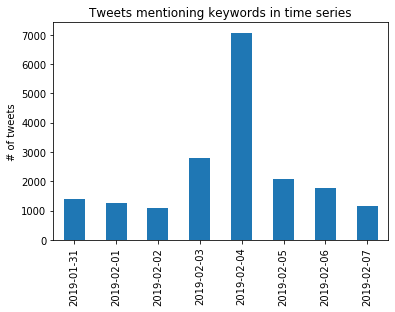

In [20]:
# 날짜별 빈도 분석하기

counts = df_tweet["date"].value_counts().sort_index()

plt.title("Tweets mentioning keywords in time series")
plt.ylabel("# of tweets")
counts.plot(kind = 'bar')
print(counts)